# Emoji Sentiment Analysis with Tweets_Chinese
        
## step3-EDA & Basic models
### 3.1 data exploring
1. plot the most requent emoji

### 3.2 topic models
1. topic moedel with all emoji --- first galance of emoji meaning
2. topic model with only concerned emojis

### 3.3 word embedding
1. word embedding with only emoji
2. word embedding with both emoji and words

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTigQWzoYCNiDyrz1BN4WTf2X2k9OZ_yvW-FsmcIMsdS9fppNmh)


In [1]:
# required libraries
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter

plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
from nltk.tokenize import word_tokenize
import gensim
import string

In [2]:
# emoji lists

joy = ['\U0001F600', '\U0001F602', '\U0001F603', '\U0001F604',
          '\U0001F606', '\U0001F607', '\U0001F609', '\U0001F60A',
          '\U0001F60B', '\U0001F60C', '\U0001F60D', '\U0001F60E',
          '\U0001F60F', '\U0001F31E', '\U0000263A', '\U0001F618',
          '\U0001F61C', '\U0001F61D', '\U0001F61B', '\U0001F63A',
          '\U0001F638', '\U0001F639', '\U0001F63B', '\U0001F63C',
          '\U00002764', '\U0001F496', '\U0001F495', '\U0001F601',
          '\U00002665']#joy

anger = ['\U0001F62C', '\U0001F620', '\U0001F610',
          '\U0001F611', '\U0001F620', '\U0001F621', '\U0001F616',
          '\U0001F624', '\U0001F63E']#anger
disgust= ['\U0001F4A9']#disgust
fear = ['\U0001F605', '\U0001F626', '\U0001F627', '\U0001F631',
          '\U0001F628', '\U0001F630', '\U0001F640']#fear
sad = ['\U0001F614', '\U0001F615', '\U00002639', '\U0001F62B',
          '\U0001F629', '\U0001F622', '\U0001F625', '\U0001F62A',
          '\U0001F613', '\U0001F62D', '\U0001F63F', '\U0001F494']#sad
surp = ['\U0001F633', '\U0001F62F', '\U0001F635', '\U0001F632']#surprise

emojilist = {'joy':joy, 'anger':anger, 'disgust':disgust, 'fear':fear, 'sad':sad, 'surprise':surp}
for i in emojilist:
    print('There are {} emoji contains in the cluster {}'.format(len(emojilist[i]), i))
    print(i,emojilist[i])

There are 29 emoji contains in the cluster joy
joy ['😀', '😂', '😃', '😄', '😆', '😇', '😉', '😊', '😋', '😌', '😍', '😎', '😏', '🌞', '☺', '😘', '😜', '😝', '😛', '😺', '😸', '😹', '😻', '😼', '❤', '💖', '💕', '😁', '♥']
There are 9 emoji contains in the cluster anger
anger ['😬', '😠', '😐', '😑', '😠', '😡', '😖', '😤', '😾']
There are 1 emoji contains in the cluster disgust
disgust ['💩']
There are 7 emoji contains in the cluster fear
fear ['😅', '😦', '😧', '😱', '😨', '😰', '🙀']
There are 12 emoji contains in the cluster sad
sad ['😔', '😕', '☹', '😫', '😩', '😢', '😥', '😪', '😓', '😭', '😿', '💔']
There are 4 emoji contains in the cluster surprise
surprise ['😳', '😯', '😵', '😲']


In [3]:
allemoji = joy + anger + disgust + fear + sad + surp
print(len(allemoji))

62


In [4]:
##########
# 3.1 Data Exploring

In [5]:
#load the cleaned data
df = pd.read_csv('tweets_cleaned_drop_zh.csv')

In [6]:
df[['tweets','emojis','c_emojis','type']]

,tweets,emojis,c_emojis,type
0,默契 挑战 ▶ 经历 毫无 默契 几轮 游戏 😂 六个 哪咤 最后 蒙眼 舞蹈 中 ...,▶ 😂 😜,😂 😜,joy
1,节省 网络 存储 存储空间 空间 😂,😂,😂,joy
2,一部 部手机 手机 拯救 乌克兰 克兰 战士 生命 一颗 毫米 卡 在手 手机 机上 喵 评...,😜,😜,joy
3,泰国 泼水 泼水节 好开心 开心 😃,😃,😃,joy
4,没 脱 一下 影片 有人 想 吗 😊,😊,😊,joy
...,...,...,...,...
140953,明天 老公 出差 天 原本 计 划 行程 乱 们 不好 约 真的 时 间 不好 乔 请 见 ...,😓,😓,sad
140954,忍住 😭,😭,😭,sad
140955,收到 毕 老师 😭 以后 一定 吃,😭,😭,sad
140956,失踪 好多 好多天 多天 有没有 没有 想 🤣 想 😭 😭 😭 晚安 💤,🤣 😭 😭 😭 💤,😭 😭 😭,sad


In [7]:
#load the cleaned data

#get the emoji list
df = pd.read_csv('tweets_cleaned_drop_zh.csv')
wordslist = []
for t in df['emojis']:
    t = t.split()
    wordslist += t

wordslist[:3]

['▶', '😂', '😜']

In [8]:
ls = []
count = Counter(wordslist)
allemoji = joy + anger + disgust + fear + sad + surp
for i in allemoji:
    x,y = i,count[i]
    ls.append([x,y])
# x,y = zip(*ls)
# x,y

ls = sorted(ls)
import pandas as pd
fredf = pd.DataFrame(ls,columns=['emoji','count'])
fredf.sort_values(by=['count'],ascending=False, inplace=True)
fredf[:11]

,emoji,count
11,😂,24580
56,😺,22697
14,😅,21641
36,😡,12069
21,😍,11635
47,😭,9841
50,😱,8973
3,❤,7113
8,💩,6779
29,😖,6167


In [9]:
fredf.to_csv('fre_emojis_zh.csv')

findfont: Font family ['Euclid Fraktur'] not found. Falling back to DejaVu Sans.
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128169 missing from current font.
  font.set_text(s, 0, flags=flags)


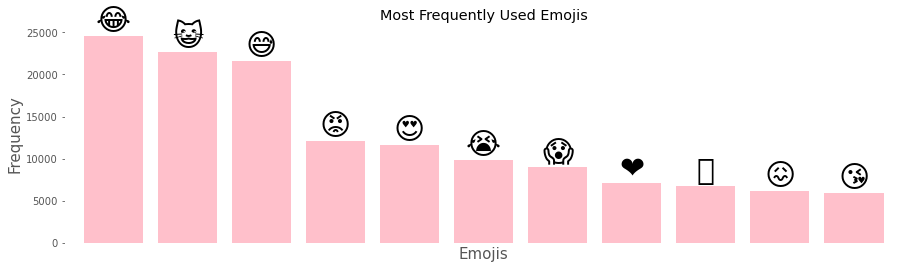

In [10]:
# draw the most frequently used emoji:
from matplotlib.font_manager import FontProperties
prop = FontProperties(fname='/Library/Fonts/Euclid Fraktur.dfont')

freqs = fredf['count'][:11]
labels = fredf['emoji'][:11]

# Plot the figure
plt.figure(figsize=(15, 4))
plt.rcParams['font.family'] = prop.get_family()

ax = pd.Series(freqs).plot(kind='bar', color='pink', width=0.8)
ax.set_title('Most Frequently Used Emojis')
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xlabel('Emojis', fontsize=15)
ax.set_facecolor(color='white')
ax.grid(False)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False,
)

new_ylim = ax.get_ylim()[1]+30
ax.set_ylim((0, new_ylim))

rects = ax.patches

# Make labels
for rect, label in zip(rects, labels):
    height = rect.get_height()
    plt.annotate(
        label,
        (rect.get_x() + rect.get_width()/2, height+5),
        ha="center",
        va="bottom",
        fontsize=30,
        fontproperties=prop.get_name()
    )

plt.show()

## 3.2 Topic model
1. topic moedel with all emoji --- first galance of emoji meaning
2. topic model with only concerned emojis

In [11]:

######################
##########
# 3.2.1 Topic model with emojis
# prepare emoji list for topic model
emlist = [em.split() for em in df['emojis']]
emlist[:3]

# train LDA model
from gensim.parsing.preprocessing import remove_stopwords
from gensim import corpora
from gensim import models

# dictionary and corpus
vocabs = corpora.Dictionary(emlist)
corpus = [vocabs.doc2bow(item) for item in emlist]

#lda model
%time lda = models.ldamodel.LdaModel(corpus=corpus, id2word=vocabs, num_topics=10)
print(lda.show_topics(-1))
corpus_lda = lda[corpus]
print(corpus_lda[0])

CPU times: user 10.2 s, sys: 48.5 ms, total: 10.3 s
Wall time: 10.3 s
[(0, '0.185*"😅" + 0.141*"🉑" + 0.072*"😱" + 0.070*"💙" + 0.061*"😡" + 0.058*"🦶" + 0.048*"🙃" + 0.034*"☀" + 0.034*"😣" + 0.029*"💯"'), (1, '0.184*"😇" + 0.156*"🥺" + 0.113*"😫" + 0.076*"\U0001f972" + 0.064*"🤩" + 0.055*"😛" + 0.050*"❗" + 0.047*"😀" + 0.029*"🙈" + 0.027*"💪"'), (2, '0.343*"😂" + 0.222*"🏻" + 0.206*"😺" + 0.203*"👋" + 0.009*"✌" + 0.004*"⬇" + 0.002*"🥛" + 0.002*"🐱" + 0.002*"🤍" + 0.001*"🍓"'), (3, '0.231*"😏" + 0.195*"😊" + 0.141*"😎" + 0.060*"😳" + 0.055*"😈" + 0.052*"✨" + 0.050*"🤤" + 0.034*"🍆" + 0.033*"🥵" + 0.022*"😚"'), (4, '0.593*"😭" + 0.086*"💖" + 0.086*"😢" + 0.084*"💗" + 0.041*"💓" + 0.024*"🐍" + 0.012*"😦" + 0.011*"😹" + 0.009*"🍑" + 0.007*"🍬"'), (5, '0.182*"💕" + 0.133*"😁" + 0.096*"👍" + 0.083*"🙏" + 0.063*"😃" + 0.057*"🤝" + 0.052*"👏" + 0.041*"☺" + 0.038*"🤣" + 0.033*"😅"'), (6, '0.179*"🤣" + 0.176*"😌" + 0.153*"😆" + 0.101*"😩" + 0.091*"🤭" + 0.080*"😓" + 0.061*"♥" + 0.026*"😪" + 0.018*"🐔" + 0.017*"💚"'), (7, '0.216*"😘" + 0.186*"😜" + 0.095*"😔"

In [12]:
#vidualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import warnings
warnings.filterwarnings('ignore')#ignore the warning

%time vis_data = gensimvis.prepare(lda, corpus, vocabs, mds='mmds')
pyLDAvis.display(vis_data)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


CPU times: user 5.86 s, sys: 149 ms, total: 6.01 s
Wall time: 9.05 s


In [13]:
###
#only explore our concerned emojis


In [14]:
df[['time','puretext','emojis','c_emojis','type']]

,time,puretext,emojis,c_emojis,type
0,2022-04-16 10:42:22+00:00,默契 挑战 经历 毫无 默契 几轮 游戏 六个 哪咤 最后 蒙眼 舞蹈 中 找回...,▶ 😂 😜,😂 😜,joy
1,2022-04-18 23:59:59+00:00,节省 网络 存储 存储空间 空间,😂,😂,joy
2,2022-04-18 23:59:57+00:00,一部 部手机 手机 拯救 乌克兰 克兰 战士 生命 一颗 毫米 卡 在手 手机 机上 喵 评...,😜,😜,joy
3,2022-04-18 23:59:56+00:00,泰国 泼水 泼水节 好开心 开心,😃,😃,joy
4,2022-04-18 23:59:55+00:00,没 脱 一下 影片 有人 想 吗,😊,😊,joy
...,...,...,...,...,...
140953,2022-04-15 17:43:11+00:00,明天 老公 出差 天 原本 计 划 行程 乱 们 不好 约 真的 时 间 不好 乔 请 见 ...,😓,😓,sad
140954,2022-04-15 17:42:54+00:00,忍住,😭,😭,sad
140955,2022-04-15 17:42:22+00:00,收到 毕 老师 以后 一定 吃,😭,😭,sad
140956,2022-04-15 17:42:13+00:00,失踪 好多 好多天 多天 有没有 没有 想 想 晚安,🤣 😭 😭 😭 💤,😭 😭 😭,sad


In [15]:
df["c_emojis"]

0           😂 😜
1             😂
2             😜
3             😃
4             😊
          ...  
140953        😓
140954        😭
140955        😭
140956    😭 😭 😭
140957        😢
Name: c_emojis, Length: 140958, dtype: object

In [16]:
df['emojis']

0             ▶ 😂 😜
1                 😂
2                 😜
3                 😃
4                 😊
            ...    
140953            😓
140954            😭
140955            😭
140956    🤣 😭 😭 😭 💤
140957            😢
Name: emojis, Length: 140958, dtype: object

In [77]:
# prepare emoji list for topic model
cels = []
emlist = [em.split() for em in df['emojis']]
for i in emlist:
    e = []
    for emo in i:
        if emo in allemoji:
            e.append(emo)
    cels.append(e)
        
print(emlist[:3])
print(cels[:3])

[['▶', '😂', '😜'], ['😂'], ['😜']]
[['😂', '😜'], ['😂'], ['😜']]


In [78]:
emlist = cels

In [82]:
# train LDA model

from gensim.parsing.preprocessing import remove_stopwords
from gensim import corpora
from gensim import models

# dictionary and corpus
vocabs = corpora.Dictionary(emlist)
corpus = [vocabs.doc2bow(item) for item in emlist]

#lda model
%time lda = models.ldamodel.LdaModel(corpus=corpus, id2word=vocabs, num_topics=6)
print(lda.show_topics(-1))
corpus_lda = lda[corpus]
print(corpus_lda[0])

CPU times: user 8.36 s, sys: 22.5 ms, total: 8.38 s
Wall time: 8.4 s
[(0, '0.202*"😌" + 0.197*"💕" + 0.193*"😏" + 0.175*"😆" + 0.092*"😓" + 0.070*"♥" + 0.045*"☺" + 0.015*"😼" + 0.008*"😕" + 0.002*"😑"'), (1, '0.281*"😜" + 0.194*"😁" + 0.166*"😔" + 0.113*"😝" + 0.094*"💔" + 0.092*"😃" + 0.028*"😱" + 0.024*"😡" + 0.005*"😨" + 0.002*"🙀"'), (2, '0.441*"😺" + 0.159*"😘" + 0.117*"😄" + 0.105*"😋" + 0.092*"😊" + 0.067*"😎" + 0.018*"😜" + 0.001*"😯" + 0.000*"😍" + 0.000*"😝"'), (3, '0.701*"😭" + 0.102*"💖" + 0.101*"😢" + 0.029*"😳" + 0.024*"😛" + 0.015*"😦" + 0.014*"🌞" + 0.007*"😖" + 0.006*"😤" + 0.000*"😐"'), (4, '0.485*"❤" + 0.188*"😇" + 0.116*"😫" + 0.067*"😥" + 0.041*"😪" + 0.035*"😻" + 0.030*"😹" + 0.019*"😿" + 0.008*"😵" + 0.005*"😰"'), (5, '0.571*"😂" + 0.271*"😍" + 0.051*"😩" + 0.043*"😉" + 0.039*"😅" + 0.015*"😀" + 0.004*"💩" + 0.003*"😬" + 0.002*"😸" + 0.001*"😠"')]
[(0, 0.0555556), (1, 0.3888327), (2, 0.05561165), (3, 0.0555556), (4, 0.0555556), (5, 0.3888889)]


In [83]:
#vidualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import warnings
warnings.filterwarnings('ignore')#ignore the warning

%time vis_data = gensimvis.prepare(lda, corpus, vocabs, mds='mmds')
pyLDAvis.display(vis_data)

CPU times: user 4.66 s, sys: 33.5 ms, total: 4.69 s
Wall time: 4.88 s


In [85]:
# get the top 10 emoji related with each topic
my_dict = {'Topic_' + str(i): [token for token, score in lda.show_topic(i, topn=10)] for i in range(0, lda.num_topics)}
for i in range(6):
    key = 'Topic_' + str(i)
    print('Top 10 related emoji in', key)
    print(my_dict[key])
    
# not very satisfying

Top 10 related emoji in Topic_0
['😌', '💕', '😏', '😆', '😓', '♥', '☺', '😼', '😕', '😑']
Top 10 related emoji in Topic_1
['😜', '😁', '😔', '😝', '💔', '😃', '😱', '😡', '😨', '🙀']
Top 10 related emoji in Topic_2
['😺', '😘', '😄', '😋', '😊', '😎', '😜', '😯', '😍', '😝']
Top 10 related emoji in Topic_3
['😭', '💖', '😢', '😳', '😛', '😦', '🌞', '😖', '😤', '😐']
Top 10 related emoji in Topic_4
['❤', '😇', '😫', '😥', '😪', '😻', '😹', '😿', '😵', '😰']
Top 10 related emoji in Topic_5
['😂', '😍', '😩', '😉', '😅', '😀', '💩', '😬', '😸', '😠']


In [187]:
# e-LDA
from gensim.models import EnsembleLda
emlist = cels
# dictionary and corpus
vocabs = corpora.Dictionary(emlist)
corpus = [vocabs.doc2bow(item) for item in emlist]

# Ensemble LDA model
elda = EnsembleLda(corpus=corpus, id2word=vocabs, num_topics=12, num_models=3)


In [188]:
elda.print_topics()

[(0,
  '0.795*"😅" + 0.036*"😬" + 0.021*"😂" + 0.018*"😛" + 0.018*"😤" + 0.015*"😡" + 0.012*"😌" + 0.009*"😆" + 0.008*"😭" + 0.006*"😖"'),
 (1,
  '0.737*"😍" + 0.037*"😩" + 0.033*"😖" + 0.016*"🙀" + 0.015*"😦" + 0.013*"😲" + 0.012*"😥" + 0.011*"💕" + 0.011*"😼" + 0.011*"😐"'),
 (2,
  '0.614*"😭" + 0.048*"😢" + 0.043*"😓" + 0.038*"💖" + 0.033*"😊" + 0.029*"😌" + 0.029*"😰" + 0.026*"😱" + 0.020*"😥" + 0.019*"😫"'),
 (3,
  '0.761*"😂" + 0.045*"😌" + 0.043*"😡" + 0.022*"😅" + 0.017*"😭" + 0.016*"😬" + 0.010*"😏" + 0.009*"😐" + 0.008*"😍" + 0.007*"😑"'),
 (4,
  '0.618*"😺" + 0.098*"😜" + 0.040*"😎" + 0.039*"💖" + 0.036*"😇" + 0.030*"😔" + 0.023*"😡" + 0.020*"😅" + 0.019*"😉" + 0.012*"😠"')]

In [201]:
import re
k = 1
for i,j in elda.print_topics():
    x = re.findall(r'"(.*?)"', str(j))
    z = ' '.join(x)
    print('Topic{}'.format(k),z)
    k += 1

Topic1 😅 😬 😂 😛 😤 😡 😌 😆 😭 😖
Topic2 😍 😩 😖 🙀 😦 😲 😥 💕 😼 😐
Topic3 😭 😢 😓 💖 😊 😌 😰 😱 😥 😫
Topic4 😂 😌 😡 😅 😭 😬 😏 😐 😍 😑
Topic5 😺 😜 😎 💖 😇 😔 😡 😅 😉 😠


In [93]:
# refer to https://medium.com/@abhi_pawar/topic-modelling-using-ensemble-lda-71d2a78666fc

### 3.3 word embedding
1. word embedding with only emoji
2. word embedding with both emoji and words

#### 3.3.1 Word embedding model with only emojis

(1) All emojis

In [210]:
# 3.3.1 Word embedding model with emojis
# all emojis
emlist = [em.split() for em in df['emojis']]
emlist[:3]

[['▶', '😂', '😜'], ['😂'], ['😜']]

In [223]:
from gensim.models import Word2Vec
# set model parameters
num_features = 12    # Word vector dimensionality                  
min_word_count = 10    # Minimum word count                     
context = 5         # Context window size 
sg = 1               # skipgram=1, cbow=0  

# train the model
%time model_emoall = Word2Vec(emlist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)

CPU times: user 1.85 s, sys: 24.2 ms, total: 1.87 s
Wall time: 1.04 s


In [215]:

list = allemoji
for i in list:
    print('the most similar words to '+i+' are:')
    print(model_emoall.wv.most_similar(i))
    print('\n')


the most similar words to 😀 are:
[('🤑', 0.9263062477111816), ('🙃', 0.884580671787262), ('😃', 0.8731232285499573), ('👭', 0.8548002243041992), ('🍜', 0.8527024984359741), ('🐛', 0.8388540744781494), ('🦠', 0.8220864534378052), ('👹', 0.7759793400764465), ('😿', 0.7741363048553467), ('🚗', 0.7668032050132751)]


the most similar words to 😂 are:
[('🤣', 0.9406999349594116), ('🦚', 0.8571413159370422), ('🤪', 0.8497730493545532), ('🤝', 0.8453781008720398), ('😅', 0.8227832317352295), ('👏', 0.8136554956436157), ('🤩', 0.8022061586380005), ('\U0001fae4', 0.7958535552024841), ('⚰', 0.7889071702957153), ('👍', 0.7539492249488831)]


the most similar words to 😃 are:
[('🙃', 0.8998453617095947), ('🤑', 0.8898351788520813), ('🐶', 0.8771345019340515), ('😀', 0.873123288154602), ('🐴', 0.849020779132843), ('🦶', 0.8231383562088013), ('🥬', 0.7848928570747375), ('😛', 0.7846954464912415), ('🙂', 0.7558143734931946), ('🐦', 0.7265647053718567)]


the most similar words to 😄 are:
[('🤟', 0.8638725876808167), ('🔗', 0.8072683

In [213]:
posit = (['😂', '😅'],['😅', '👍'],['🙃', '😅'],['💩', '😡'],['😀','👏'],['🎉','😆'],['😘', '♥'])
negat = (['😅', '👍'],['💋', '♥'],['😘', '♥'])

In [224]:

# have fun
for i in posit:
    print('{}+{}=?'.format(i[0],i[1]))
    print(model_emoall.wv.most_similar(positive=i)[0])
    print()

for i in negat:
    print('{}-{}=?'.format(i[0],i[1]))
    print(model_emoall.wv.most_similar(negative=i)[0])
    print()

😂+😅=?
('🤣', 0.9115279316902161)

😅+👍=?
('👏', 0.9126605987548828)

🙃+😅=?
('🥔', 0.8510034680366516)

💩+😡=?
('🥝', 0.9158835411071777)

😀+👏=?
('🤝', 0.9011209011077881)

🎉+😆=?
('♥', 0.9093188643455505)

😘+♥=?
('🎁', 0.8969756364822388)

😅-👍=?
('😾', 0.14914603531360626)

💋-♥=?
('😓', 0.058745983988046646)

😘-♥=?
('🐍', 0.03790425881743431)



In [225]:
# only print answers
for i in posit:
    print(model_emoall.wv.most_similar(positive=i)[0][0])
    print()
print('----')
for i in negat:
    print(model_emoall.wv.most_similar(negative=i)[0][0])
    print()

🤣

👏

🥔

🥝

🤝

♥

🎁

----
😾

😓

🐍



In [ ]:
# cbow
# check robustness with cobow

In [226]:
emlist = [em.split() for em in df['emojis']]
emlist[:3]

[['▶', '😂', '😜'], ['😂'], ['😜']]

In [231]:
from gensim.models import Word2Vec
# set model parameters
num_features = 12    # Word vector dimensionality                  
min_word_count = 10    # Minimum word count                     
context = 5         # Context window size 
sg = 0               # skipgram=1, cbow=0  

# train the model
%time model_emoall = Word2Vec(emlist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)

CPU times: user 1.49 s, sys: 30.2 ms, total: 1.52 s
Wall time: 994 ms


In [232]:

list = allemoji
for i in list:
    print('the most similar words to '+i+' are:')
    print(model_emoall.wv.most_similar(i))
    print('\n')


the most similar words to 😀 are:
[('🤑', 0.8540153503417969), ('😃', 0.8424466252326965), ('🙃', 0.8388726115226746), ('😿', 0.7639145851135254), ('🦠', 0.7475191950798035), ('🔪', 0.7394686341285706), ('👭', 0.7129198908805847), ('👹', 0.6967374086380005), ('💊', 0.6204172968864441), ('\U0001fa96', 0.6191812753677368)]


the most similar words to 😂 are:
[('🤣', 0.8716588020324707), ('😅', 0.7661218643188477), ('🤝', 0.7588591575622559), ('👏', 0.7430828809738159), ('🤪', 0.685817539691925), ('\U0001f978', 0.6824738383293152), ('🤏', 0.6689642071723938), ('👍', 0.6198065876960754), ('💩', 0.6163094639778137), ('🖇', 0.6070414185523987)]


the most similar words to 😃 are:
[('🙃', 0.902187168598175), ('🤑', 0.8749116659164429), ('😀', 0.8424466848373413), ('🐶', 0.778167724609375), ('🦶', 0.7568866014480591), ('😸', 0.7047823667526245), ('🐸', 0.702867329120636), ('👂', 0.7012652158737183), ('🐴', 0.6979681849479675), ('🦖', 0.6692323684692383)]


the most similar words to 😄 are:
[('🤟', 0.8367605209350586), ('🔗', 0

In [233]:

# have fun
for i in posit:
    print('{}+{}=?'.format(i[0],i[1]))
    print(model_emoall.wv.most_similar(positive=i)[0])
    print()

for i in negat:
    print('{}-{}=?'.format(i[0],i[1]))
    print(model_emoall.wv.most_similar(negative=i)[0])
    print()

😂+😅=?
('🤣', 0.8549758195877075)

😅+👍=?
('👏', 0.9250127077102661)

🙃+😅=?
('🐸', 0.7649479508399963)

💩+😡=?
('🤮', 0.8415215015411377)

😀+👏=?
('👍', 0.8170387148857117)

🎉+😆=?
('♥', 0.8515318036079407)

😘+♥=?
('🌙', 0.9085524678230286)

😅-👍=?
('🎡', 0.46885889768600464)

💋-♥=?
('😰', 0.5048569440841675)

😘-♥=?
('😰', 0.38184916973114014)



In [234]:
# only print answers
for i in posit:
    print(model_emoall.wv.most_similar(positive=i)[0][0])
    print()
print('----')
for i in negat:
    print(model_emoall.wv.most_similar(negative=i)[0][0])
    print()

🤣

👏

🐸

🤮

👍

♥

🌙

----
🎡

😰

😰



***(2). concerned emojis***

In [300]:
#####
# only concerned emojis
emlist = cels

In [301]:

from gensim.models import Word2Vec
# set model parameters
num_features = 6    # Word vector dimensionality                  
min_word_count = 10    # Minimum word count                     
context = 5           # Context window size 
sg = 1                # skipgram=1, cbow=0  

# train the model
%time model_emoall = Word2Vec(emlist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)
# 6 10 5 1 nice

CPU times: user 850 ms, sys: 122 ms, total: 972 ms
Wall time: 993 ms


In [306]:
list = allemoji
for i in list:
    print('the most similar words to '+i+' are:')
    print(model_emoall.wv.most_similar(i)[:3])
    print('\n')

the most similar words to 😀 are:
[('😃', 0.907488226890564), ('😛', 0.9067442417144775), ('😿', 0.8756786584854126)]


the most similar words to 😂 are:
[('😅', 0.8887560963630676), ('😤', 0.7959608435630798), ('😡', 0.7770524621009827)]


the most similar words to 😃 are:
[('😀', 0.9074881672859192), ('😛', 0.9028877019882202), ('😿', 0.8551495671272278)]


the most similar words to 😄 are:
[('😯', 0.8469766974449158), ('😑', 0.8381404280662537), ('😲', 0.8176588416099548)]


the most similar words to 😆 are:
[('😫', 0.8851718902587891), ('💕', 0.8818404674530029), ('😵', 0.871975302696228)]


the most similar words to 😇 are:
[('😸', 0.8595939874649048), ('😺', 0.7786911725997925), ('😧', 0.7724090814590454)]


the most similar words to 😉 are:
[('☺', 0.9434975981712341), ('😩', 0.8644902110099792), ('😤', 0.82890784740448)]


the most similar words to 😊 are:
[('😝', 0.9831726551055908), ('😋', 0.8931039571762085), ('😬', 0.8170219659805298)]


the most similar words to 😋 are:
[('😊', 0.8931039571762085), ('😘', 0

In [169]:

# have fun
for i in (['😂', '😅'],['💩', '😡'],['😀','💕'],['😉','😆']):
    print('{}+{}=?'.format(i[0],i[1]))
    print(model_emoall.wv.most_similar(positive=i)[0])
    print()

for i in (['😅', '😂'],['😘', '♥']):
    print('{}-{}=?'.format(i[0],i[1]))
    print(model_emoall.wv.most_similar(negative=i)[0])
    print()

😂+😅=?
('🤣', 0.8411944508552551)

💩+😡=?
('🤢', 0.8146000504493713)

😀+💕=?
('💐', 0.8266302347183228)

😉+😆=?
('🐱', 0.8273217678070068)

😅-😂=?
('➡', 0.4758891761302948)

😘-♥=?
('🧐', 0.35283344984054565)



### Analogy Tasks
v.s. emoji2vec

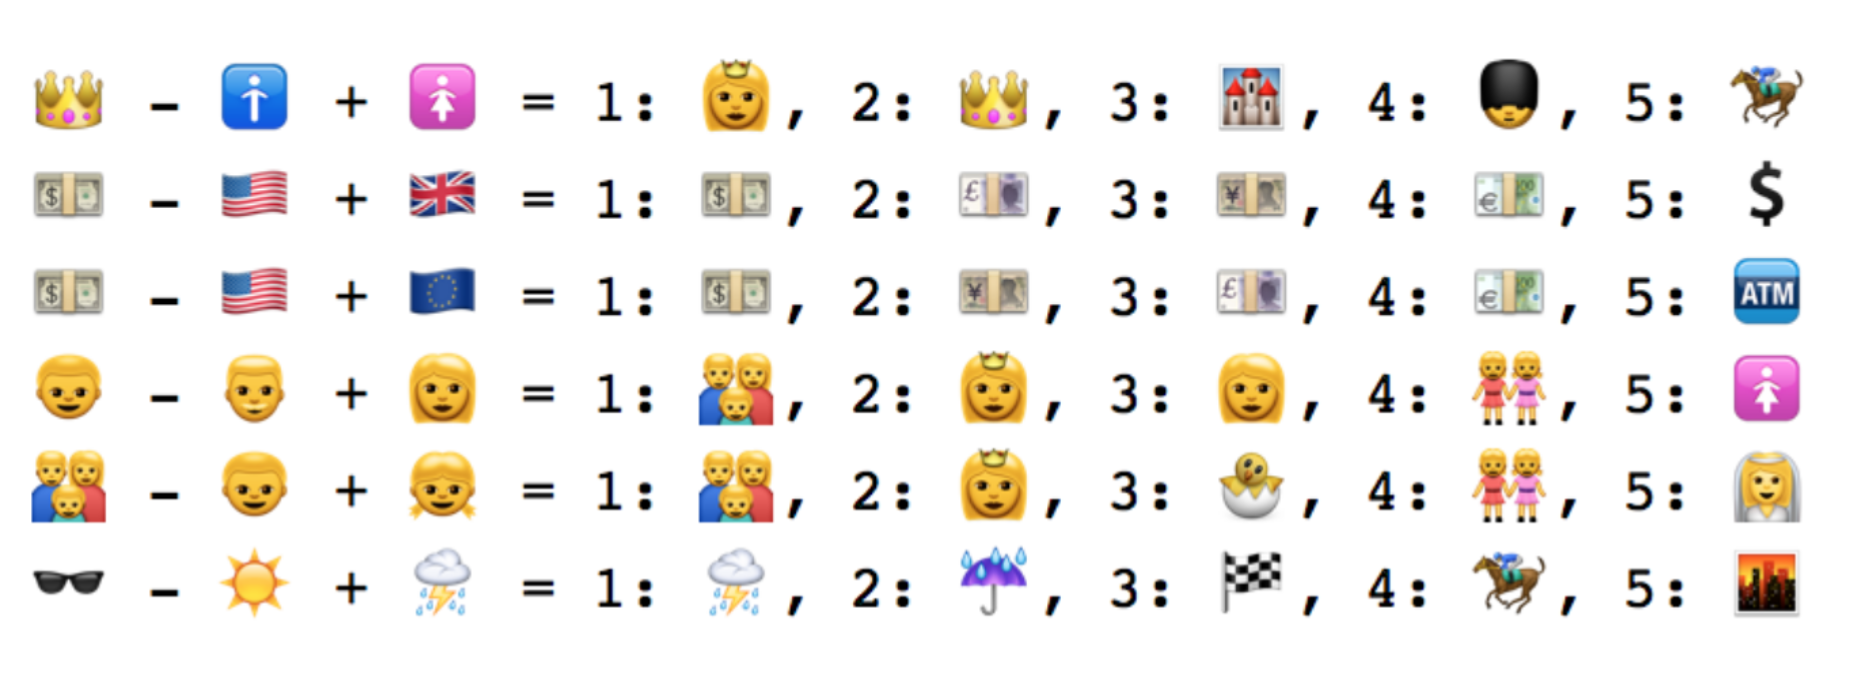

In [295]:
################
# analogy tasks v.s. emoji2vec
emlist = [em.split() for em in df['emojis']]
emlist[:3]
from gensim.models import Word2Vec
# set model parameters
num_features = 20    # Word vector dimensionality                  
min_word_count = 1    # Minimum word count                     
context = 5         # Context window size 
sg = 0               # skipgram=1, cbow=0  

# train the model
%time model_emoall = Word2Vec(emlist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)



CPU times: user 1.52 s, sys: 20.5 ms, total: 1.54 s
Wall time: 993 ms


In [272]:
model_emoall.wv.key_to_index.keys()# don't run, show the key

dict_keys(['😂', '🏻', '😺', '👋', '😅', '😡', '😍', '😭', '😱', '❤', '💩', '😖', '😘', '😳', '🤣', '😤', '💦', '😆', '💕', '😏', '👍', '😜', '😄', '😋', '😎', '🙏', '😌', '💖', '😊', '🥺', '🔥', '👇', '😇', '😁', '😬', '😰', '😑', '😠', '🥰', '💗', '🤪', '😉', '😢', '😐', '😨', '🙈', '👏', '🤭', '🤝', '🤢', '😝', '🤤', '♥', '😃', '✨', '😵', '➕', '🥵', '‼', '❓', '😀', '😈', '💓', '🐍', '🤔', '😛', '☺', '😿', '😔', '😦', '📣', '🏽', '😩', '🤜', '💫', '🍆', '💪', '\U0001f972', '🙉', '😫', '🐔', '😓', '❗', '👉', '🐶', '🉑', '🌞', '✌', '🤩', '🐻', '🌹', '🍃', '♀', '👴', '🤮', '🤗', '✈', '🤨', '😻', '💔', '🥳', '🎉', '🔞', '🤦', '🐰', '🤬', '😹', '🙄', '💥', '🧡', '\U0001f979', '🐥', '⚠', '👹', '🌸', '🙃', '💜', '♂', '😯', '💞', '👊', '😥', '🐿', '👅', '😚', '⬇', '💙', '🙀', '🍑', '\U0001fae3', '😲', '😣', '🎁', '🦶', '🔗', '\U0001fae2', '🌈', '💋', '🏼', '💰', '🤫', '🦠', '💛', '👀', '💚', '⚡', '\U0001fae0', '🌟', '💎', '💘', '💯', '🍼', '🐷', '🧐', '😧', '😮', '🏨', '💢', '🥴', '🌿', '🤟', '🆘', '☀', '😼', '✅', '😪', '🈶', '🎀', '💊', '➡', '🔹', '🍌', '🍬', '🙋', '\U0001fa96', '🌚', '📷', '🎂', '🈲', '🤯', '👌', '💝', '🤡', '👻', '🧸', '😾', '\U00

In [296]:
# a = ['👑','💵','💵']
# b = ['🙍‍♂️','🇺🇸','🇺🇸']
# c = ['🧑','🙎','🙎']
# 🧑
# for i in range(3):
#     print('{} - {} + {} = '.format(a[i],b[i],c[i]))
#     print(model_emoall.wv.most_similar(positive=[a[i],c[i]], negative = b[i]))
#     print()
    
print(model_emoall.wv.most_similar(positive=['👑','👩'], negative = '👨'))
print(model_emoall.wv.most_similar(positive=['🕶','🌧'], negative = '🔆'))

[('🎬', 0.7804651856422424), ('🐄', 0.7804617285728455), ('🍊', 0.776890218257904), ('🥀', 0.7228591442108154), ('🤶', 0.7052462697029114), ('🌟', 0.699759840965271), ('☎', 0.6958444714546204), ('🥛', 0.6956292390823364), ('🎮', 0.6941453218460083), ('🍟', 0.6937063336372375)]
[('🆔', 0.7841910123825073), ('🛀', 0.7704938650131226), ('⌨', 0.7542609572410583), ('♿', 0.7511354684829712), ('\U0001fae7', 0.7503392696380615), ('🥩', 0.7451390027999878), ('💸', 0.7368101477622986), ('🉐', 0.7149401307106018), ('💼', 0.7124351263046265), ('🏹', 0.7018091678619385)]
[('🥄', 0.8775427341461182), ('▫', 0.8762306571006775), ('🥣', 0.8683052659034729), ('🎌', 0.8471070528030396), ('🕚', 0.8384168744087219), ('🐕', 0.8374328017234802), ('⬅', 0.837260365486145), ('🐓', 0.8292480111122131), ('♐', 0.8270298838615417), ('🎧', 0.8200687766075134)]


#### 3.3.2 emojis + text
***emojis+text***

In [28]:
##################

In [29]:
# 3.3.2 Word embedding model with emojis&text

In [307]:
# emojis+tweets
emlist = [em.split() for em in df['tweets']]
emlist[1]

['节省', '网络', '存储', '存储空间', '空间', '😂']

In [308]:
from gensim.models import Word2Vec
# set model parameters
num_features = 200    # Word vector dimensionality                  
min_word_count = 100    # Minimum word count                     
context = 5           # Context window size 
sg = 1                # cbow=0  

# train the model
%time model_emotext = Word2Vec(emlist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)

CPU times: user 56.5 s, sys: 323 ms, total: 56.8 s
Wall time: 19.9 s


In [309]:
list = allemoji
for i in list:
    print('the most similar words to '+i+' are:')
    print(model_emotext.wv.most_similar(i))
    print('\n')

the most similar words to 😀 are:
[('烟丝', 0.5216119289398193), ('沉香', 0.5090359449386597), ('电子', 0.4927593469619751), ('药膏', 0.46705806255340576), ('烟', 0.4641926884651184), ('膏', 0.4628154933452606), ('大增', 0.45953887701034546), ('😃', 0.4310281276702881), ('增大', 0.39531728625297546), ('😿', 0.3848060965538025)]


the most similar words to 😂 are:
[('到时候', 0.40846967697143555), ('刀子', 0.4047810137271881), ('情况', 0.3954640328884125), ('先觉', 0.39432063698768616), ('外扬', 0.3928067684173584), ('先知先觉', 0.3893476724624634), ('打屁股', 0.38833728432655334), ('家丑', 0.3868963122367859), ('双人', 0.38228389620780945), ('哈哈哈哈', 0.38186919689178467)]


the most similar words to 😃 are:
[('烟丝', 0.47447144985198975), ('沉香', 0.4594379663467407), ('😀', 0.4310280680656433), ('电子', 0.4169800579547882), ('药膏', 0.4091002941131592), ('吞', 0.3910268545150757), ('🦶', 0.3799668252468109), ('过分', 0.37123432755470276), ('适合', 0.3627195954322815), ('☀', 0.3600528836250305)]


the most similar words to 😄 are:
[('讨论', 0.4

KeyError: "Key '😕' not present"

In [ ]:
# have fun
# not very satisfying

# have fun
for i in posit:
    print('{}+{}=?'.format(i[0],i[1]))
    print(model_emotext.wv.most_similar(positive=i))
    print()

for i in negat:
    print('{}-{}=?'.format(i[0],i[1]))
    print(model_emotext.wv.most_similar(negative=i))
    print()

In [244]:
from gensim.models import Word2Vec
# set model parameters
num_features = 200    # Word vector dimensionality                  
min_word_count = 100    # Minimum word count                     
context = 5           # Context window size 
sg = 0                # cbow=0  

# train the model
%time model_emotext = Word2Vec(emlist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)

CPU times: user 18 s, sys: 142 ms, total: 18.1 s
Wall time: 6.55 s


In [245]:
list = allemoji
for i in list:
    print('the most similar words to '+i+' are:')
    print(model_emotext.wv.most_similar(i))
    print('\n')

the most similar words to 😀 are:
[('烟丝', 0.6921887397766113), ('沉香', 0.6575838327407837), ('药膏', 0.6559580564498901), ('膏', 0.6246415376663208), ('🙃', 0.605787992477417), ('电子', 0.5867862105369568), ('\U0001fa96', 0.5543772578239441), ('烟', 0.5446509718894958), ('🦠', 0.540786862373352), ('大增', 0.5313732028007507)]


the most similar words to 😂 are:
[('😅', 0.49938392639160156), ('精神', 0.3616686761379242), ('丑', 0.3600834608078003), ('好笑', 0.3366124629974365), ('有心', 0.33632510900497437), ('领导', 0.3356710374355316), ('心事', 0.312175989151001), ('围观', 0.3051501512527466), ('分手', 0.30355337262153625), ('地主', 0.29987433552742004)]


the most similar words to 😃 are:
[('烟丝', 0.49645140767097473), ('沉香', 0.4618481993675232), ('🦶', 0.45910969376564026), ('😀', 0.44573524594306946), ('电子', 0.44017332792282104), ('🙃', 0.43452128767967224), ('适合', 0.42519688606262207), ('药膏', 0.4032696783542633), ('吞', 0.3889579772949219), ('有着', 0.3825474679470062)]


the most similar words to 😄 are:
[('讨论', 0.4445

KeyError: "Key '😕' not present"

In [247]:
# have fun
# not very satisfying
for i in posit:
    print('{}+{}=?'.format(i[0],i[1]))
    print(model_emotext.wv.most_similar(positive=i))
    print()

for i in negat:
    print('{}-{}=?'.format(i[0],i[1]))
    print(model_emotext.wv.most_similar(negative=i))
    print()

😂+😅=?
[('丑', 0.3737374544143677), ('精神', 0.3685208261013031), ('智商', 0.3300243616104126), ('分手', 0.32551538944244385), ('好像', 0.3216230273246765), ('存', 0.3157705068588257), ('😑', 0.3118135929107666), ('不够', 0.30424967408180237), ('领导', 0.3041318655014038), ('好笑', 0.30347055196762085)]

😅+👍=?
[('👏', 0.5622429251670837), ('🤝', 0.46515610814094543), ('一同', 0.4054062068462372), ('😂', 0.40016117691993713), ('贼', 0.3923700451850891), ('有志一同', 0.3604840040206909), ('蔡', 0.34470829367637634), ('🙏', 0.3436887264251709), ('祖宗', 0.3323824107646942), ('分手', 0.3305652439594269)]

🙃+😅=?
[('沉香', 0.4569089412689209), ('😀', 0.44107937812805176), ('药膏', 0.44012871384620667), ('烟丝', 0.43109965324401855), ('粉红', 0.41213107109069824), ('😃', 0.39410945773124695), ('有效', 0.3751394748687744), ('智商', 0.374582976102829), ('印度', 0.36804908514022827), ('增大', 0.3587498068809509)]

💩+😡=?
[('🖕', 0.45099180936813354), ('屎', 0.4226767420768738), ('👹', 0.41300883889198303), ('大便', 0.40518733859062195), ('🦠', 0.4047105

In [298]:
# emojis+tweets
emlist = [em.split() for em in df['tweets']]
emlist[1]

from gensim.models import Word2Vec
# set model parameters
num_features = 200    # Word vector dimensionality                  
min_word_count = 1    # Minimum word count                     
context = 5           # Context window size 
sg = 0                # cbow=0  

# train the model
%time model_emotext = Word2Vec(emlist, vector_size=num_features, window=context, min_count=min_word_count, sg=sg)

CPU times: user 26.9 s, sys: 168 ms, total: 27 s
Wall time: 10.1 s


In [299]:
print(model_emotext.wv.most_similar(positive=['👑','👩'], negative = '👨'))
print(model_emotext.wv.most_similar(positive=['🕶','🌧'], negative = '🔆'))

[('祝', 0.5125749111175537), ('勇猛', 0.4839266836643219), ('端', 0.48365312814712524), ('庆', 0.4758400321006775), ('乞', 0.4609621465206146), ('节', 0.454479843378067), ('瀬', 0.44822409749031067), ('大米', 0.4476422071456909), ('享有', 0.4462072551250458), ('男友', 0.4443597197532654)]
[('🚿', 0.7215628027915955), ('瘫', 0.7154609560966492), ('海星', 0.6840440630912781), ('牛油', 0.65944904088974), ('鸿儒', 0.655656635761261), ('离职', 0.6453654766082764), ('乞怜', 0.6423090100288391), ('洗身', 0.6418864727020264), ('省事', 0.6392302513122559), ('缺氧', 0.638924777507782)]


In [248]:
# visualization
keys = ['😀','🤣','😘','😡','😂','😅']
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    try:
        for similar_word, _ in model_emotext.wv.most_similar(word, topn=10):
            words.append(similar_word)
            embeddings.append(model_emotext.wv[similar_word])
        embedding_clusters.append(embeddings)
        word_clusters.append(words)
    except:
        continue


In [249]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

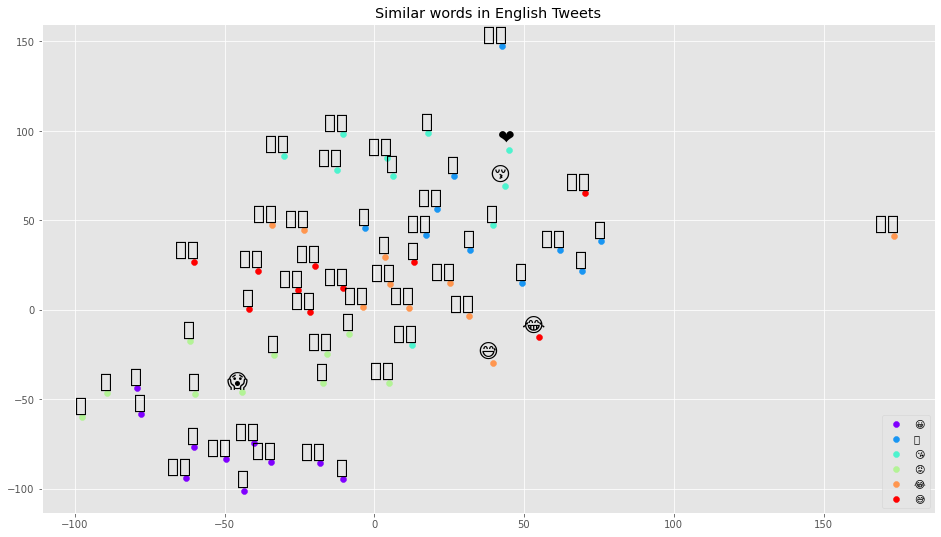

In [250]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')#ignore the warning

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=1, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=20)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150)
    plt.show()


tsne_plot_similar_words('Similar words in English Tweets', keys, embeddings_en_2d, word_clusters, 1,
                        'similar_words.png')

In [258]:
# #############
# #match words

# phr = '快乐'
# N = 5

# # get the vector representaiton
# vec = model_emotext.wv[phr]

# # query the tensorflow model
# res = []
# for colIx in range(0, len(mapping)):
#     predict = session.run(model.prob, feed_dict={
#         model.col: np.array([colIx]),
#         model.orig_vec: np.array([vec])
#     })
#     res.append(predict)

# # print the top N emoji
# for ind in sorted(range(len(res)), key=lambda i: res[i], reverse=True)[:N]:
#     print(mapping[ind], res[ind])

NameError: name 'mapping' is not defined